# Problem Statement

Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

# Step 1: Import the data

In [2]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
# Get the information regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Step 2: Data Preparation

In [6]:
# Check Null values in the dataset
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# To learn about the statistics about the data 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Drop unimportant columns

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [11]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Encode the categorical data
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df=pd.get_dummies(df,drop_first=True)

In [14]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Step 3: Visualize the dataset

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

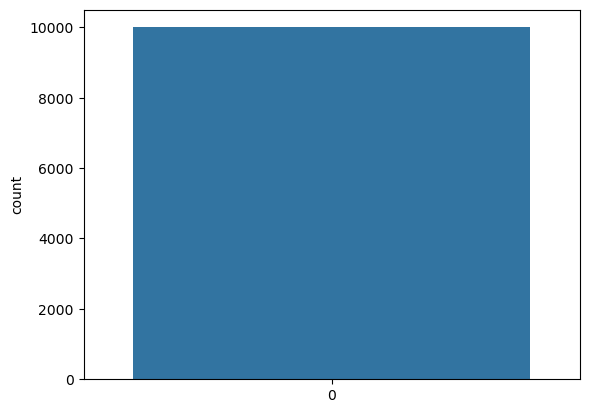

In [17]:
sns.countplot(df['Exited'])
plt.show()

In [18]:
X=df.drop('Exited',axis=1)
y=df['Exited']

# Step 4: Creating Training and Testing Data

In [19]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

# Step 5: Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()

In [23]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

# Step #6: Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
# Compare and predict the success ratio
accuracy_score(y_test,y_pred)

0.808

In [31]:
# Since our data is imbalanced we cannot use accuracy to measure the model's power. Therefore we need to use use precision
from sklearn.metrics import precision_score,recall_score,f1_score

In [32]:
precision_score(y_test,y_pred)

0.5891472868217055

In [33]:
recall_score(y_test,y_pred)

0.18673218673218672

In [34]:
f1_score(y_test,y_pred)

0.2835820895522388

In [35]:
# The scores are very low because our data is imbalanced.
# We balance the data with SMOTHE(Synthetic Minority Oversampling Technique)

# Step 7: Synthetic Minority Oversampling Technique

In [36]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [37]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [38]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [39]:
# WE used minoriy oversampling to fill the minority instead of reducing the majority because we loose the data 
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Step #8: Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[ 0.38908862, -0.29622148, -1.02872131, ...,  1.31522052,
        -0.63415863, -1.23420903],
       [ 1.09753509,  0.10581987, -1.39614238, ..., -0.76032877,
        -0.63415863,  0.81023552],
       [-0.42834961,  1.21143359, -0.66130024, ...,  1.31522052,
        -0.63415863, -1.23420903],
       ...,
       [ 0.20380262,  0.20633021,  1.1758051 , ..., -0.76032877,
        -0.63415863,  0.81023552],
       [-0.79892161, -1.4018352 , -0.66130024, ...,  1.31522052,
        -0.63415863,  0.81023552],
       [ 0.53077791,  1.01041292, -1.39614238, ...,  1.31522052,
        -0.63415863,  0.81023552]])

# Step 9: Applying Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model=LogisticRegression()

In [44]:
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
# Compare and predict the success ratio
accuracy_score(y_test,y_pred)

0.7796610169491526

In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [49]:
precision_score(y_test,y_pred)

0.7684542586750789

In [50]:
recall_score(y_test,y_pred)

0.7842884739214424

In [51]:
f1_score(y_test,y_pred)

0.7762906309751435

# Applying SVC

In [52]:
from sklearn import svm

In [53]:
svm=svm.SVC()

In [54]:
svm.fit(X_train,y_train)

SVC()

In [55]:
y_pred_new=svm.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred_new)

0.8452605147520402

In [57]:
precision_score(y_test,y_pred_new)

0.8473132372214941

# KNeighbors Classifiers

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier()

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
y_predict_knn=knn.predict(X_test)

In [62]:
precision_score(y_test,y_predict_knn)

0.8066126013724267

In [63]:
accuracy_score(y_test,y_predict_knn)

0.8210922787193974

# Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt=DecisionTreeClassifier()

In [66]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_predict_dt=dt.predict(X_test)

In [68]:
accuracy_score(y_test,y_predict_dt)

0.8038292529817953

In [69]:
precision_score(y_test,y_predict_dt)

0.7881987577639752

# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier()

In [72]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_predict_rf=rf.predict(X_test)

In [74]:
accuracy_score(y_test,y_predict_rf)

0.8681732580037664

In [75]:
precision_score(y_test,y_predict_rf)

0.8647778493238892

# Gradient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbc=GradientBoostingClassifier()

In [78]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [79]:
y_predict_gbc=gbc.predict(X_test)

In [80]:
accuracy_score(y_test,y_predict_gbc)

0.8418079096045198

In [81]:
precision_score(y_test,y_predict_gbc)

0.8425865447419987

In [82]:
final_df=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_new),accuracy_score(y_test,y_predict_knn),accuracy_score(y_test,y_predict_dt),accuracy_score(y_test,y_predict_rf),accuracy_score(y_test,y_predict_gbc)]})

In [83]:
final_df

,Models,ACC
0,LR,0.779661
1,SVC,0.845261
2,KNN,0.821092
3,DT,0.803829
4,RF,0.868173
5,GBC,0.841808


In [84]:
# Since random forest has the highest accuracy value on our dataset we use RF as our model

In [85]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

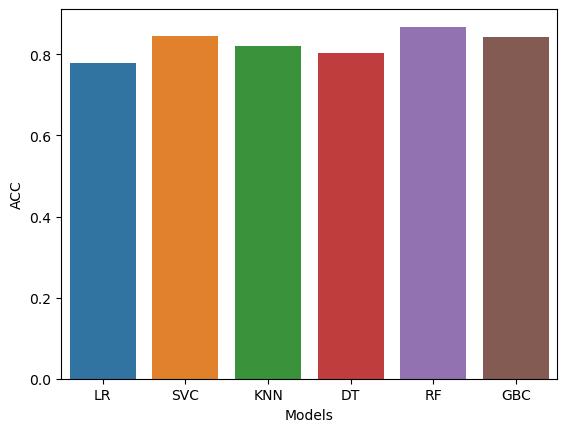

In [86]:
sns.barplot(x=final_df['Models'],y=final_df['ACC'])

In [87]:
final_df_ = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'PRC':[precision_score(y_test,y_pred),precision_score(y_test,y_pred_new),precision_score(y_test,y_predict_knn),precision_score(y_test,y_predict_dt),precision_score(y_test,y_predict_rf),precision_score(y_test,y_predict_gbc)]})

In [88]:
final_df_

,Models,PRC
0,LR,0.768454
1,SVC,0.847313
2,KNN,0.806613
3,DT,0.788199
4,RF,0.864778
5,GBC,0.842587


<Axes: xlabel='Models', ylabel='PRC'>

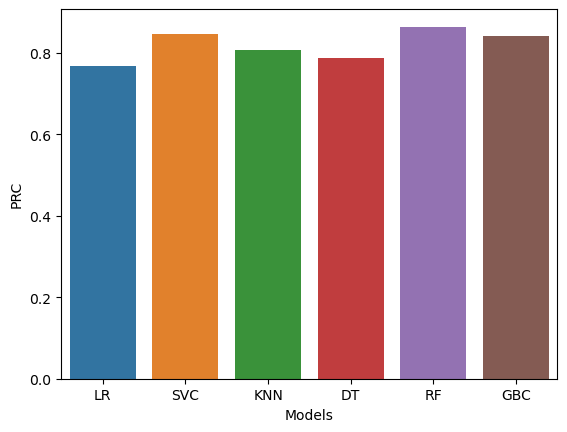

In [89]:
sns.barplot(x=final_df_['Models'],y=final_df_['PRC'])

# Step 10: Save the Model of Random Forest

In [90]:
#Enter the entire dataset
X_res=sc.fit_transform(X_res)

In [91]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [92]:
import joblib

In [93]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [94]:
saved_model=joblib.load('churn_predict_model')

In [95]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [96]:
saved_model.predict([[400,32,15,111110,0,0,0,10348.88,0,0,1]])

array([1], dtype=int64)

In [ ]:
1 indicates the customer exits the bank